In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from math import exp , pi
# from numpy.linalg import inv, det
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = analytics.read_csv('../data/Data1.csv')
df_raw = df_raw.drop('Unnamed: 0',axis=1)
df_raw = df_raw.rename(columns = {"0":'x',"1":'y'})
df_raw

,x,y
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


<Axes: xlabel='x', ylabel='y'>

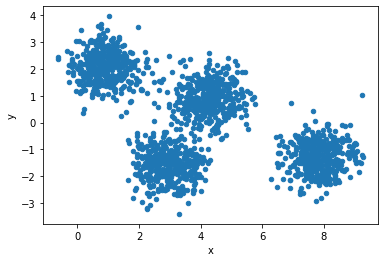

In [3]:
df_raw.plot('x','y',kind = 'scatter')

In [4]:
number_of_clusters = 4
number_of_datapoints = df_raw.shape[0]
number_of_attributes = df_raw.shape[1]

In [5]:
max_loops = 100

In [6]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)

In [7]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)

[[[0.54052074]
  [0.63395041]]

 [[0.27727519]
  [0.22661492]]

 [[0.77648137]
  [0.02104284]]

 [[0.71149872]
  [0.37899063]]]
===
[[[0.66876309 0.15816898]
  [0.09937073 0.71805682]]

 [[0.22271223 0.86615761]
  [0.10490604 0.58566388]]

 [[0.69518266 0.98703732]
  [0.18202062 0.75977853]]

 [[0.27504947 0.38730122]
  [0.21302009 0.79554428]]]
===
[0.29658414 0.2832317  0.3283598  0.09182436]


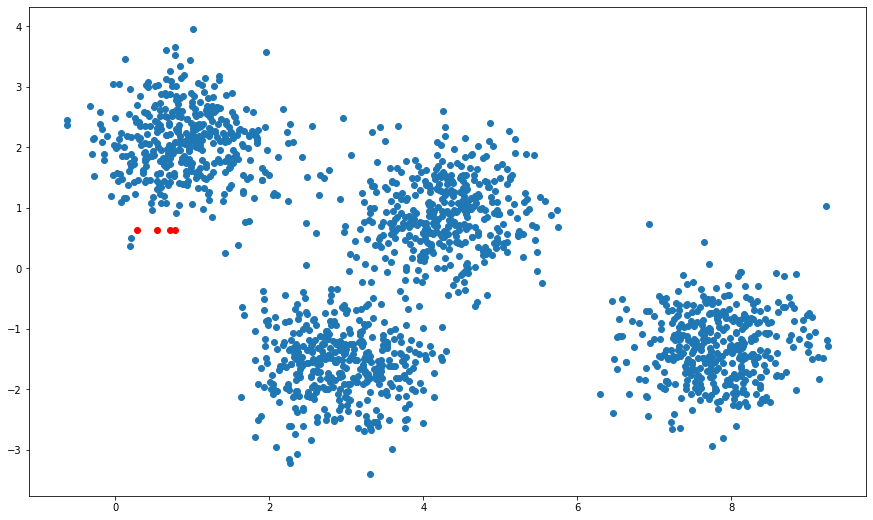

In [8]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[0][1],c = 'red')
graph.scatter(means[2][0],means[0][1],c = 'red')
graph.scatter(means[3][0],means[0][1],c = 'red')

# MK 2

In [185]:
def mahalonabis_distance(x,mean,inv) :
    return float((x-mean).T @ inv @ (x-mean))

def multivariate_gaussian_distribution(x,mean,sigma_inv, sigma_det):
    n = len(x)
    exponential = exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
    if exponential > 1: 
        raise ValueError('Exponential Limit crossed !!')
        # break
    else :
        p = ( 1 / ((2*pi)**n * abs(sigma_det))**0.5 ) * exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
        # if p > 1 : raise ValueError('Probability Limit Exceeded than 1 !')
        # else : return p
        return p 

def normalise(p_i,number_of_datapoints,number_of_clusters):
    sum_i = []
    for i in range(number_of_datapoints):
        sum_j = []
        for j in range(number_of_clusters): sum_j.append(p_i[j][i])
        sum_i.append(sum(sum_j))
    
    for i in range(number_of_datapoints):
        for j in range(number_of_clusters):
            p_i[j][i] = p_i[j][i]/sum_i[i] 
    return p_i

[0.07866426 0.51223737 0.27651686 0.13258152]


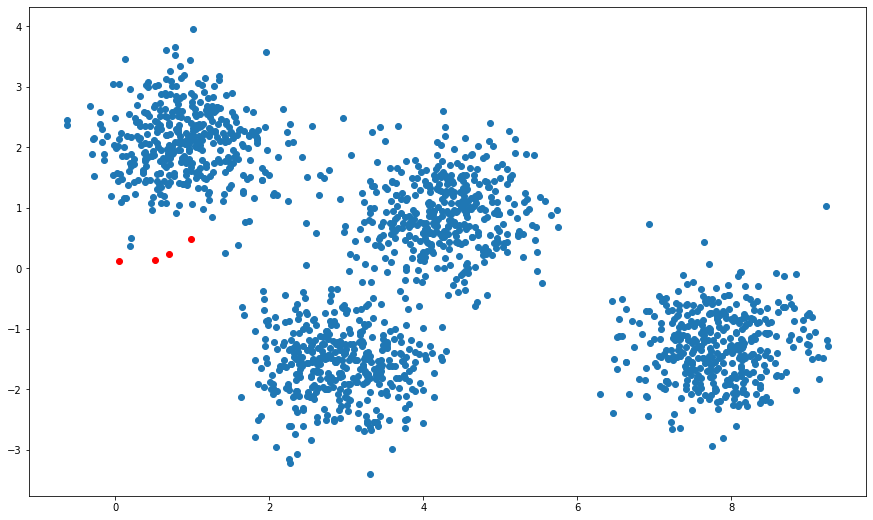

In [421]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)
print(probabilities)
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')

In [423]:
p_i = []
sigmas_old = sigmas + 1
probabilities_old = probabilities + 1
means_old = means + 1
tolerance = 1e-2
loop = 1
max_loops = 100
# while abs(maths.linalg.norm(probabilities) - 1) > tolerance :
# while maths.linalg.norm(gm.means_) - maths.linalg.norm(means) > tolerance :
while maths.linalg.norm(probabilities - (1/number_of_clusters)) > tolerance :
# for k in range(max_loops):
    loop = loop + 1
    sigmas_old = sigmas.copy()
    probabilities_old = probabilities.copy()
    means_old = means.copy()
    for cluster in range(number_of_clusters):
        sigma = sigmas[cluster] 
        mean = means[cluster]
        probability = probabilities[cluster]
        p_ij = []
        det = maths.linalg.det(sigma)
        inv = maths.linalg.inv(sigma)
        for x in df_raw.itertuples(index = False, name = None):
            x = maths.matrix(x).reshape(-1,1)
            p_ij.append((probability * multivariate_gaussian_distribution(x,mean,inv,det) ))
        p_i.append(p_ij)
        
    p_i = normalise(p_i,number_of_datapoints,number_of_clusters)
    
    for cluster in range(number_of_clusters):
        p_ij = p_i[cluster]
        sum_cluster = sum(p_ij)
    
        mean = 0
        for j in range(number_of_datapoints) :
            mean = mean + p_ij[j]/sum_cluster * df_raw.iloc[j]
        means[cluster] = maths.matrix(mean).T
    
        sigma = 0 
        for j in range(number_of_datapoints) :
            x = maths.matrix(df_raw.iloc[j]).T
            sigma = sigma + (p_ij[j] / (sum_cluster - 1)) * (x - means[cluster]) @ (x - means[cluster]).T
        sigmas[cluster] = sigma
    
        probabilities[cluster] = sum_cluster/number_of_datapoints


ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.title("Loop #"+str(loop))
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')

KeyboardInterrupt: 